In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("parkinsons_updrs.data")

x_dtf=dataset.drop('motor_UPDRS', axis=1).drop('total_UPDRS',axis=1).drop('subject#',axis=1)
y_dtf=dataset["motor_UPDRS"]

x = np.array(x_dtf)
y = np.array(y_dtf)

train_len = int(len(x)*0.8)

x_train = x[:train_len]
y_train = y[:train_len]

x_test = x[train_len:]
y_test = y[train_len:]

print(dataset)

      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0        

In [2]:

from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn import tree



dt = tree.DecisionTreeRegressor(min_samples_leaf=1) # {"squared_error", "friedman_mse", "absolute_error", "poisson"}
model = dt.fit(x_train,y_train)


preds=model.predict(x_test)

print("The RVE is: ", explained_variance_score(y_test, preds))
print("The rmse is: ", mean_squared_error(y_test, preds, squared=False))
corr, pval=pearsonr(y_test, preds)
print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))

print("The Maximum Error is is: ", max_error(y_test, preds))
print("The Mean Absolute Error is: ", mean_absolute_error(y_test, preds))

#import matplotlib.pyplot as plt
#plt.figure(figsize=(15,15))
#r=tree.plot_tree(model, filled=True)
#plt.show()

The RVE is:  -0.6165324666924645
The rmse is:  12.454132039236292
The Correlation Score is is: 0.3368 (p-value=1.474468e-32)

The Maximum Error is is:  27.485
The Mean Absolute Error is:  10.563597021276596


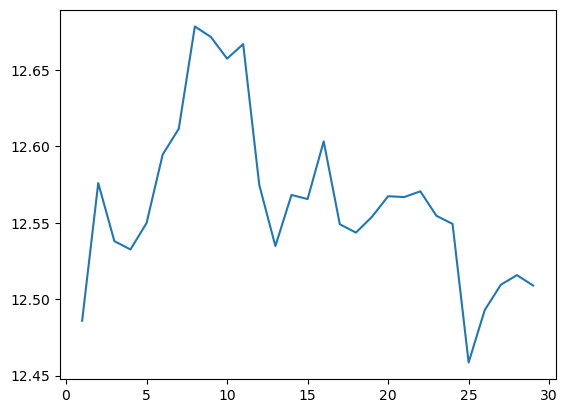

In [3]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plot

x = []
y = []
for min in range(1,30):
    rt = tree.DecisionTreeRegressor(min_samples_leaf=min)
    rt.fit(x_train,y_train)

    preds=rt.predict(x_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    #print("Min = {} ; rmse = {}".format(min,rmse))

    x.append(min)
    y.append(rmse)

plot.plot(x,y)



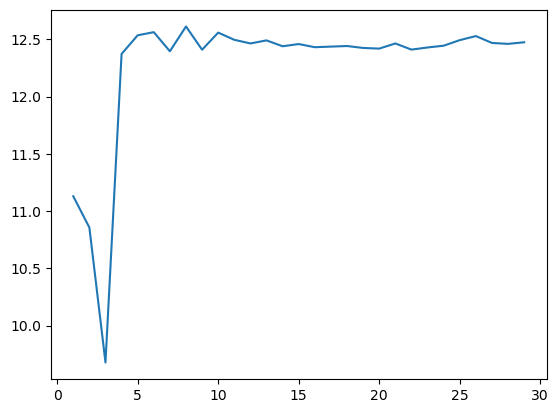

In [4]:

x = []
y = []
for max in range(1,30):
    rt = tree.DecisionTreeRegressor(max_depth=max)
    rt.fit(x_train,y_train)

    preds=rt.predict(x_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    #print("Min = {} ; rmse = {}".format(min,rmse))

    x.append(max)
    y.append(rmse)

plot.plot(x,y)



In [5]:
"""
#my solution
import json
results = list()

for min_sl in range(1,10):
    mdl = tree.DecisionTreeRegressor(min_samples_leaf=min_sl)
    mdl.fit(x_train, y_train)
    preds = mdl.predict(x_test)

    RVE=explained_variance_score(y_test, preds)
    rmse=mean_squared_error(y_test, preds, squared=False)
    corr, pval=pearsonr(y_test, preds)
    corr_score="%6.4f (p-value=%e)\n"%(corr,pval)
    max_error_r=max_error(y_test, preds)
    mean_absolute_error_r=mean_absolute_error(y_test, preds)

    print("The RVE is: ", RVE)
    print("The rmse is: ", rmse)
    print("The Correlation Score is is: " + corr_score)

    print("The Maximum Error is is: ", max_error_r)
    print("The Mean Absolute Error is: ", mean_absolute_error_r)

    res = {
        "min_samples": min_sl,
        
        "RVE": RVE,
        "rmse": rmse,
        "corr_score": corr_score,
        "max_error": max_error_r,
        "mean_absolute_error": mean_absolute_error_r
    }
    results.append(res)
    
for min_sl in range(1,10):
    for max_d in range(1,10):
        mdl = DecisionTreeClassifier(min_samples_leaf=min_sl,max_depth=max_d)
        mdl.fit(X_train, y_train)
        preds = mdl.predict(X_test)

        precision_s=precision_score(y_test, preds)
        recall_s=recall_score(y_test, preds)
        f1_s=f1_score(y_test, preds)
        matthews_corrcoeficient=matthews_corrcoef(y_test, preds)

        #print("Min Samples Leaf: {} ; Max Depth: {}".format(min_sl,max_d))
        #print("The Precision is: %7.4f" % precision_s)
        #print("The Recall is: %7.4f" % recall_s)
        #print("The F1 score is: %7.4f" % f1_s)
        #print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoeficient)
        #print()

        res = {
            "min_samples": min_sl,
            "max_depth": max_d,
            
            "precision": precision_s,
            "recall": recall_s,
            "f1": f1_s,
            "matthews_correlation_coeficient": matthews_corrcoeficient
        }
        results.append(res)
        
#pretty = json.dumps(results, indent=4)
#print(pretty)
max_precision = max(results, key=lambda x: x['precision'])
print("Max Precision: {}".format(max_precision))
max_recall = max(results, key=lambda x: x['recall'])
print("Max Recall: {}".format(max_recall))
max_f1 = max(results, key=lambda x: x['f1'])
print("Max F1: {}".format(max_f1))
max_mathew_corrcoef = max(results, key=lambda x: x['matthews_correlation_coeficient'])
print("Max Mathews Correlation Coeficient: {}".format(max_mathew_corrcoef))


"""

'\n#my solution\nimport json\nresults = list()\n\nfor min_sl in range(1,10):\n    mdl = tree.DecisionTreeRegressor(min_samples_leaf=min_sl)\n    mdl.fit(x_train, y_train)\n    preds = mdl.predict(x_test)\n\n    RVE=explained_variance_score(y_test, preds)\n    rmse=mean_squared_error(y_test, preds, squared=False)\n    corr, pval=pearsonr(y_test, preds)\n    corr_score="%6.4f (p-value=%e)\n"%(corr,pval)\n    max_error_r=max_error(y_test, preds)\n    mean_absolute_error_r=mean_absolute_error(y_test, preds)\n\n    print("The RVE is: ", RVE)\n    print("The rmse is: ", rmse)\n    print("The Correlation Score is is: " + corr_score)\n\n    print("The Maximum Error is is: ", max_error_r)\n    print("The Mean Absolute Error is: ", mean_absolute_error_r)\n\n    res = {\n        "min_samples": min_sl,\n        \n        "RVE": RVE,\n        "rmse": rmse,\n        "corr_score": corr_score,\n        "max_error": max_error_r,\n        "mean_absolute_error": mean_absolute_error_r\n    }\n    results.

In [29]:
from distutils.command.build_scripts import first_line_re
import itertools


criterions = ["squared_error", "friedman_mse", "absolute_error","poisson"]
splitters = ["best", "random"]
max_depths = range(10,100,10)
max_features = ["auto", "sqrt", "log2"]
min_samples_leaf = range(1,30,1)
min_samples_splits = range(2,30,1)
#... other hyper params

hyperparams_combinations = itertools.product(criterions, splitters, max_depths, max_features, min_samples_leaf, min_samples_splits)

results_l = []

first_loop = True
for params in hyperparams_combinations:
    criterion, splitter, max_depth, max_features, min_samples_leaf, min_sample_split = params

    mdl = tree.DecisionTreeRegressor(criterion=criterion,splitter=splitter,max_depth=max_depth,max_features=max_features,min_samples_leaf=min_samples_leaf,min_samples_split=min_sample_split)
    mdl.fit(x_train, y_train)
    preds = mdl.predict(x_test)

    RVE=explained_variance_score(y_test, preds)
    rmse=mean_squared_error(y_test, preds, squared=False)
    corr, pval=pearsonr(y_test, preds)
    corr_score="%6.4f (p-value=%e)\n"%(corr,pval)
    max_error_r=max_error(y_test, preds)
    mean_absolute_error_r=mean_absolute_error(y_test, preds)

    results_l.append({
        "params": { 
            "criterion": criterion,
            "splitter": splitter,
            "max_depth": max_depth,
            "max_features": max_features,
            "min_samples_leaf": min_samples_leaf,
            "min_sample_split": min_sample_split
        },

        "RVE": RVE,
        "rmse": rmse,
        "corr_score": corr_score,
        "max_error_r": max_error_r,
        "mean_absolute_error_r": mean_absolute_error_r
    })
    if first_loop:
        print(results_l[0])
        first_loop = False

#print(results_l)
results_params = [ x["params"] for x in results_l ]
results_RVE = [ x["RVE"] for x in results_l ]
results_rmse = [ x["rmse"] for x in results_l ]
results_corr_score = [ x["corr_score"] for x in results_l ]
results_max_error_r = [ x["max_error_r"] for x in results_l ]
results_mean_absolute_error_r = [ x["mean_absolute_error_r"] for x in results_l ]

results = pd.DataFrame({
    "params": results_params,
    "RVE": results_RVE,
    "rmse": results_rmse,
    "corr_score": results_corr_score,
    "max_error_r": results_max_error_r,
    "mean_absolute_error_r": results_mean_absolute_error_r
})


c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rap

{'params': {'criterion': 'squared_error', 'splitter': 'best', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_sample_split': 2}, 'RVE': -0.5880734392123972, 'rmse': 12.47344635769645, 'corr_score': '0.3283 (p-value=6.431796e-31)\n', 'max_error_r': 27.12166666666667, 'mean_absolute_error_r': 10.655100195127613}


c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rapos\miniconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\rap

In [28]:


best_RVE = results["RVE"].max()
_RVE_best_params = results.loc[results['RVE'] == best_RVE]
RVE_best_params =dict(_RVE_best_params["params"])

print("RVE: {} with params: {}".format(best_RVE, RVE_best_params))

rmse_best = results["rmse"].min()
_rmse_best_params = results.loc[results['rmse'] == rmse_best]
rmse_best_params = dict(_rmse_best_params["params"])

print("best_rmse: {} with params {}".format(rmse_best, rmse_best_params))

best_pcorr_score = results["corr_score"].max()
_pcorr_score_best_params = results.loc[results['corr_score'] == best_pcorr_score]
pcorr_score_best_params =dict(_pcorr_score_best_params["params"])

print("best_pcorr_score: {} with params {}".format(best_pcorr_score, pcorr_score_best_params))

#print(results.loc[results['corr_score'] == best_pcorr_score])

# Maximum Error
# Mean Absolute Error


RVE: 0.10552004858663677 with params: {26660: {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 60, 'min_samples_leaf': 25, 'min_sample_split': 6}}
best_rmse: 8.855735910248962 with params {7524: {'criterion': 'squared_error', 'splitter': 'random', 'max_depth': 10, 'min_samples_leaf': 8, 'min_sample_split': 22}}
best_pcorr_score: 0.5042 (p-value=8.979232e-77)
 with params {26660: {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 60, 'min_samples_leaf': 25, 'min_sample_split': 6}}
